In [38]:
# main libraries
import pandas as pd
import numpy as np
import time

# visualization
from matplotlib import pyplot as plt
import seaborn as sns

# sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [41]:
cc_data=pd.read_csv('../Data/creditcard.csv')
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
#make all colum names lower case for easy of use and check for missing values
cc_data.columns = [x.lower() for x in cc_data.columns]
cc_data.isnull().sum()

time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
amount    0
class     0
dtype: int64

In [43]:
#drop the time column
cc_data.drop(['time'],axis=1,inplace=True)
print(cc_data.shape)
#quick overview of the amount column
cc_data.amount.describe()

(284807, 30)


count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: amount, dtype: float64

In [48]:
# find proportion of fraudulent transactions in the dataset
fraud = cc_data.loc[cc_data['class'] == 1]
valid = cc_data.loc[cc_data['class'] == 0]
#calculate percentages
p1= len(fraud)/len(cc_data)
p2 = len(valid)/len(cc_data)
print('fraudulent transaction :',p1*100,'%')
print('valid transaction:',p2*100,'%')
print('There are a total of',len(fraud),'fraudulent transactions')

fraudulent transaction : 0.1727485630620034 %
valid transaction: 99.82725143693798 %
There are a total of 492 fraudulent transactions


The data is heavily unbalanced, which is expected since most transactions are not fraudulent.
If this becomes a problem later in the modeling stage, we can either doensample the majority class or upsample the minority class. Forn nor let's see how a baseline model performs 

In [49]:
from sklearn.model_selection import StratifiedKFold
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
X = cc_data.drop(['class'], axis = 1)
y = cc_data["class"]
for train_index, test_index in sss.split(X, y):
    print("train:", train_index, "test:", test_index)
    original_X_train, original_X_test = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    

train: [ 30473  30496  31002 ... 284804 284805 284806] test: [    0     1     2 ... 57017 57018 57019]
train: [     0      1      2 ... 284804 284805 284806] test: [ 30473  30496  31002 ... 113964 113965 113966]
train: [     0      1      2 ... 284804 284805 284806] test: [ 81609  82400  83053 ... 170946 170947 170948]
train: [     0      1      2 ... 284804 284805 284806] test: [150654 150660 150661 ... 227866 227867 227868]
train: [     0      1      2 ... 227866 227867 227868] test: [212516 212644 213092 ... 284804 284805 284806]


In [52]:
#undersampling majority class
#shuffle data
cc_data = cc_data.sample(frac=1)
# amount of fraud classes 492 rows.
valid2 = cc_data.loc[cc_data['class'] == 0][:492]
normal_distributed_df = pd.concat([fraud, valid2])
# Shuffle dataframe rows
new_data = normal_distributed_df.sample(frac=1, random_state=42)
new_data.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
174736,2.153662,-0.823099,-0.861365,-0.900218,-0.790777,-0.764313,-0.684937,-0.135740,-0.468947,0.933637,...,0.249161,0.781103,0.152941,-0.000959,-0.098717,-0.178533,-0.014790,-0.067812,5.00,0
248296,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,-4.230984,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,0.00,1
64018,1.169271,-0.289111,0.638979,-0.090242,-1.016944,-0.847740,-0.388628,0.061640,0.386117,-0.005600,...,-0.071851,-0.383233,0.105890,0.551291,-0.010069,0.877160,-0.091288,0.002545,30.93,0
239501,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,...,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,237.26,1
143336,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,...,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1


Text(0.5, 1.0, 'Equally Distributed Classes')

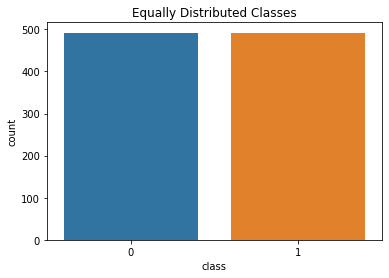

In [54]:
sns.countplot('class', data=new_data)
plt.title('Equally Distributed Classes')

In [7]:
#analyse the amount spent on fraudulent transactions
fraud.amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: amount, dtype: float64

In [8]:
valid.amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: amount, dtype: float64

(0.0, 25691.16)

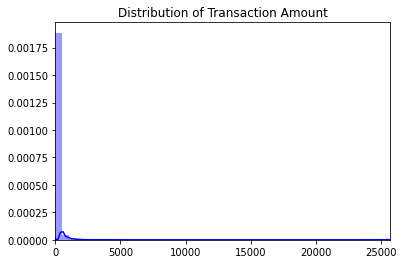

In [35]:
amount_val = cc_data['amount'].values
sns.distplot(amount_val, color='blue')
plt.title('Distribution of Transaction Amount')
plt.xlim([min(cc_data.amount), max(cc_data.amount)])


The mean average mean spent on fraudulent transactions is higher than for valid transactions: $122 vs $88. 

### Prep data for modeling

In [55]:
# seperate response variable from the explanatory variable
X = new_data.drop(['class'], axis = 1)
y = new_data["class"]
print(X.shape)
print(y.shape)

(984, 29)
(984,)


In [56]:
#split data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

### Modeling

In [63]:
# Classifiers that we'll use
classifiers = {
    "LogisiticR": LogisticRegression(solver='liblinear'),
    "KNN": KNeighborsClassifier(),
   # "SVM": SVC(),
    "DecisionTree": DecisionTreeClassifier()
}

In [65]:
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, " training score:", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression  training score: 94.0 % accuracy score
Classifiers:  KNeighborsClassifier  training score: 89.0 % accuracy score
Classifiers:  DecisionTreeClassifier  training score: 90.0 % accuracy score


[[56855    14]
 [   19    74]]


In [24]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.84      0.80      0.82        93

    accuracy                           1.00     56962
   macro avg       0.92      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962

